In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

from utils import modeling 
from utils import analysis_pipeline

In [3]:
# sample1 = modeling.sample(0,1,2)
# sample2 = modeling.sample(1,1,2)
# print(sample1,sample2)

In [4]:
# decision1 = modeling.decision(sample1,0.5)
# decision2 = modeling.decision(sample2,0.5)
# print(decision1,decision2)

In [5]:
# print(modeling.accuracy([0,0],decision1))
# print(modeling.accuracy([1,1],decision2))

In [6]:
# ground_truth = [2,1]
# print(modeling.accuracy(ground_truth,modeling.decision(modeling.sample(0,1,2),0.4)))
# print(modeling.accuracy(ground_truth,modeling.decision(modeling.sample(0.5,1,2),0.4)))

In [7]:
set_sizes = np.random.randint(3,6,1000)
df = pd.DataFrame(set_sizes, columns=['set_size'])
df


,set_size
0,3
1,5
2,3
3,5
4,4
...,...
995,3
996,5
997,3
998,5


In [8]:
stimulus = []
for (row_index,row_data) in df.iterrows():
    stimulus.append(modeling.generate_stim(row_data['set_size']))

df['stim'] = stimulus

In [9]:
mean = []
for (row_index,row_data) in df.iterrows():
    mean.append(modeling.generate_mean(row_data['set_size']))

df['mean'] = mean

In [10]:
cue = []
for (row_index,row_data) in df.iterrows():
    cue.append(modeling.cue(row_data['stim']))

df['cue'] = cue

In [11]:
sample = []
for (row_index,row_data) in df.iterrows():
    sample.append(modeling.sample(0.5,0.4))

df['sample'] = sample

In [12]:
decision = []
for (row_index,row_data) in df.iterrows():
    decision.append(modeling.decision_random(row_data['stim'],row_data['sample'],row_data['cue'],0.5))

df['decision'] = decision

In [13]:
df

,set_size,stim,mean,cue,sample,decision
0,3,"[0.39816468710123487, 0.7521326602871827, 0.43...",2.333333,0.752133,1.065427,1.818460
1,5,"[0.3494365024020287, 0.23751875935134836, 0.35...",1.400000,0.866006,0.095139,0.497897
2,3,"[0.4465845770628357, 0.6127061488729547, 0.484...",2.333333,0.446585,0.399832,0.782768
3,5,"[0.09178769685059329, 0.3732845286588349, 0.64...",1.400000,0.640650,0.204579,0.327589
4,4,"[0.7572951977182711, 0.17405512774221765, 0.07...",1.750000,0.757295,0.249445,0.379109
...,...,...,...,...,...,...
995,3,"[0.15752212255936748, 0.9860038206379518, 0.08...",2.333333,0.082005,-0.209164,0.618728
996,5,"[0.054179178474216605, 0.23388067460227147, 0....",1.400000,0.054179,0.980824,-0.952442
997,3,"[0.45204263427884495, 0.6781395212008156, 0.72...",2.333333,0.720880,1.120132,2.090926
998,5,"[0.7724760902147821, 0.6293040022430213, 0.286...",1.400000,0.612983,0.624104,0.993191


In [14]:
# ground_truth = []
# for (row_index,row_data) in df.iterrows():
#     ground_truth.append(1)

# df['ground_truth'] = ground_truth

In [15]:
df

,set_size,stim,mean,cue,sample,decision
0,3,"[0.39816468710123487, 0.7521326602871827, 0.43...",2.333333,0.752133,1.065427,1.818460
1,5,"[0.3494365024020287, 0.23751875935134836, 0.35...",1.400000,0.866006,0.095139,0.497897
2,3,"[0.4465845770628357, 0.6127061488729547, 0.484...",2.333333,0.446585,0.399832,0.782768
3,5,"[0.09178769685059329, 0.3732845286588349, 0.64...",1.400000,0.640650,0.204579,0.327589
4,4,"[0.7572951977182711, 0.17405512774221765, 0.07...",1.750000,0.757295,0.249445,0.379109
...,...,...,...,...,...,...
995,3,"[0.15752212255936748, 0.9860038206379518, 0.08...",2.333333,0.082005,-0.209164,0.618728
996,5,"[0.054179178474216605, 0.23388067460227147, 0....",1.400000,0.054179,0.980824,-0.952442
997,3,"[0.45204263427884495, 0.6781395212008156, 0.72...",2.333333,0.720880,1.120132,2.090926
998,5,"[0.7724760902147821, 0.6293040022430213, 0.286...",1.400000,0.612983,0.624104,0.993191


In [16]:
df['cue_rad'] = analysis_pipeline.rad_convert(df['cue'])
df['decision_rad'] = analysis_pipeline.rad_convert(df['decision'])

In [17]:
df

,set_size,stim,mean,cue,sample,decision,cue_rad,decision_rad
0,3,"[0.39816468710123487, 0.7521326602871827, 0.43...",2.333333,0.752133,1.065427,1.818460,4.725789,11.425721
1,5,"[0.3494365024020287, 0.23751875935134836, 0.35...",1.400000,0.866006,0.095139,0.497897,5.441274,3.128379
2,3,"[0.4465845770628357, 0.6127061488729547, 0.484...",2.333333,0.446585,0.399832,0.782768,2.805974,4.918276
3,5,"[0.09178769685059329, 0.3732845286588349, 0.64...",1.400000,0.640650,0.204579,0.327589,4.025323,2.058303
4,4,"[0.7572951977182711, 0.17405512774221765, 0.07...",1.750000,0.757295,0.249445,0.379109,4.758226,2.382010
...,...,...,...,...,...,...,...,...
995,3,"[0.15752212255936748, 0.9860038206379518, 0.08...",2.333333,0.082005,-0.209164,0.618728,0.515254,3.887583
996,5,"[0.054179178474216605, 0.23388067460227147, 0....",1.400000,0.054179,0.980824,-0.952442,0.340418,-5.984372
997,3,"[0.45204263427884495, 0.6781395212008156, 0.72...",2.333333,0.720880,1.120132,2.090926,4.529425,13.137674
998,5,"[0.7724760902147821, 0.6293040022430213, 0.286...",1.400000,0.612983,0.624104,0.993191,3.851488,6.240404


In [28]:
stim_rad = []

for (row_index,row_data) in df.iterrows():
    buffer = []
    for value in row_data['stim']:
        buffer.append(analysis_pipeline.rad_convert(value))
    stim_rad.append(buffer)

df['stim_rad'] =  stim_rad

In [29]:
df

,set_size,stim,mean,cue,sample,decision,cue_rad,decision_rad,stim_rad,choice,correct
0,3,"[0.39816468710123487, 0.7521326602871827, 0.43...",2.333333,0.752133,1.065427,1.818460,4.725789,11.425721,"[2.5017425118322363, 4.725788880166322, 2.7559...",-3.141384,0
1,5,"[0.3494365024020287, 0.23751875935134836, 0.35...",1.400000,0.866006,0.095139,0.497897,5.441274,3.128379,"[2.1955742976846513, 1.492374378935916, 2.2313...",-3.138100,0
2,3,"[0.4465845770628357, 0.6127061488729547, 0.484...",2.333333,0.446585,0.399832,0.782768,2.805974,4.918276,"[2.805973653014219, 3.8497462722171374, 3.0415...",-3.140082,0
3,5,"[0.09178769685059329, 0.3732845286588349, 0.64...",1.400000,0.640650,0.204579,0.327589,4.025323,2.058303,"[0.5767191082315017, 2.3454158658666486, 4.025...",-3.140398,0
4,4,"[0.7572951977182711, 0.17405512774221765, 0.07...",1.750000,0.757295,0.249445,0.379109,4.758226,2.382010,"[4.758226059501101, 1.093620621269168, 0.45371...",-3.139485,0
...,...,...,...,...,...,...,...,...,...,...,...
995,3,"[0.15752212255936748, 0.9860038206379518, 0.08...",2.333333,0.082005,-0.209164,0.618728,0.515254,3.887583,"[0.9897406860207598, 6.195244718655315, 0.5152...",-3.141553,0
996,5,"[0.054179178474216605, 0.23388067460227147, 0....",1.400000,0.054179,0.980824,-0.952442,0.340418,-5.984372,"[0.3404178181442583, 1.469515618294242, 1.5816...",-3.140981,0
997,3,"[0.45204263427884495, 0.6781395212008156, 0.72...",2.333333,0.720880,1.120132,2.090926,4.529425,13.137674,"[2.840267637919594, 4.260876275826764, 4.52942...",-3.141059,0
998,5,"[0.7724760902147821, 0.6293040022430213, 0.286...",1.400000,0.612983,0.624104,0.993191,3.851488,6.240404,"[4.853610420185052, 3.954033660642661, 1.80227...",-3.141263,0


In [37]:
choice = []
for (row_index,row_data) in df.iterrows():
    choice.append(modeling.find_stim_choice(row_data['stim_rad'],row_data['decision_rad']))
    
df['choice'] = choice

In [38]:
df

,set_size,stim,mean,cue,sample,decision,cue_rad,decision_rad,stim_rad,choice,correct
0,3,"[0.39816468710123487, 0.7521326602871827, 0.43...",2.333333,0.752133,1.065427,1.818460,4.725789,11.425721,"[2.5017425118322363, 4.725788880166322, 2.7559...",2,0
1,5,"[0.3494365024020287, 0.23751875935134836, 0.35...",1.400000,0.866006,0.095139,0.497897,5.441274,3.128379,"[2.1955742976846513, 1.492374378935916, 2.2313...",5,0
2,3,"[0.4465845770628357, 0.6127061488729547, 0.484...",2.333333,0.446585,0.399832,0.782768,2.805974,4.918276,"[2.805973653014219, 3.8497462722171374, 3.0415...",2,0
3,5,"[0.09178769685059329, 0.3732845286588349, 0.64...",1.400000,0.640650,0.204579,0.327589,4.025323,2.058303,"[0.5767191082315017, 2.3454158658666486, 4.025...",3,0
4,4,"[0.7572951977182711, 0.17405512774221765, 0.07...",1.750000,0.757295,0.249445,0.379109,4.758226,2.382010,"[4.758226059501101, 1.093620621269168, 0.45371...",1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,3,"[0.15752212255936748, 0.9860038206379518, 0.08...",2.333333,0.082005,-0.209164,0.618728,0.515254,3.887583,"[0.9897406860207598, 6.195244718655315, 0.5152...",3,0
996,5,"[0.054179178474216605, 0.23388067460227147, 0....",1.400000,0.054179,0.980824,-0.952442,0.340418,-5.984372,"[0.3404178181442583, 1.469515618294242, 1.5816...",3,0
997,3,"[0.45204263427884495, 0.6781395212008156, 0.72...",2.333333,0.720880,1.120132,2.090926,4.529425,13.137674,"[2.840267637919594, 4.260876275826764, 4.52942...",1,0
998,5,"[0.7724760902147821, 0.6293040022430213, 0.286...",1.400000,0.612983,0.624104,0.993191,3.851488,6.240404,"[4.853610420185052, 3.954033660642661, 1.80227...",3,0


In [43]:
cue_choice = []
for (row_index,row_data) in df.iterrows():
    cue_choice.append(row_data['stim'].index(row_data['cue'])+1)
    
df['cue_choice'] = cue_choice

In [44]:
accuracy = []
for (row_index,row_data) in df.iterrows():
    accuracy.append(modeling.accuracy(row_data['cue_choice'],row_data['choice']))
    
df['correct'] = accuracy

In [45]:
df

,set_size,stim,mean,cue,sample,decision,cue_rad,decision_rad,stim_rad,choice,correct,cue_choice
0,3,"[0.39816468710123487, 0.7521326602871827, 0.43...",2.333333,0.752133,1.065427,1.818460,4.725789,11.425721,"[2.5017425118322363, 4.725788880166322, 2.7559...",2,1,2
1,5,"[0.3494365024020287, 0.23751875935134836, 0.35...",1.400000,0.866006,0.095139,0.497897,5.441274,3.128379,"[2.1955742976846513, 1.492374378935916, 2.2313...",5,1,5
2,3,"[0.4465845770628357, 0.6127061488729547, 0.484...",2.333333,0.446585,0.399832,0.782768,2.805974,4.918276,"[2.805973653014219, 3.8497462722171374, 3.0415...",2,0,1
3,5,"[0.09178769685059329, 0.3732845286588349, 0.64...",1.400000,0.640650,0.204579,0.327589,4.025323,2.058303,"[0.5767191082315017, 2.3454158658666486, 4.025...",3,1,3
4,4,"[0.7572951977182711, 0.17405512774221765, 0.07...",1.750000,0.757295,0.249445,0.379109,4.758226,2.382010,"[4.758226059501101, 1.093620621269168, 0.45371...",1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,"[0.15752212255936748, 0.9860038206379518, 0.08...",2.333333,0.082005,-0.209164,0.618728,0.515254,3.887583,"[0.9897406860207598, 6.195244718655315, 0.5152...",3,1,3
996,5,"[0.054179178474216605, 0.23388067460227147, 0....",1.400000,0.054179,0.980824,-0.952442,0.340418,-5.984372,"[0.3404178181442583, 1.469515618294242, 1.5816...",3,0,1
997,3,"[0.45204263427884495, 0.6781395212008156, 0.72...",2.333333,0.720880,1.120132,2.090926,4.529425,13.137674,"[2.840267637919594, 4.260876275826764, 4.52942...",1,0,3
998,5,"[0.7724760902147821, 0.6293040022430213, 0.286...",1.400000,0.612983,0.624104,0.993191,3.851488,6.240404,"[4.853610420185052, 3.954033660642661, 1.80227...",3,0,4


<Axes: title={'center': 'Set Size Effect on Accuracy'}, xlabel='Set Size', ylabel='Accuracy'>

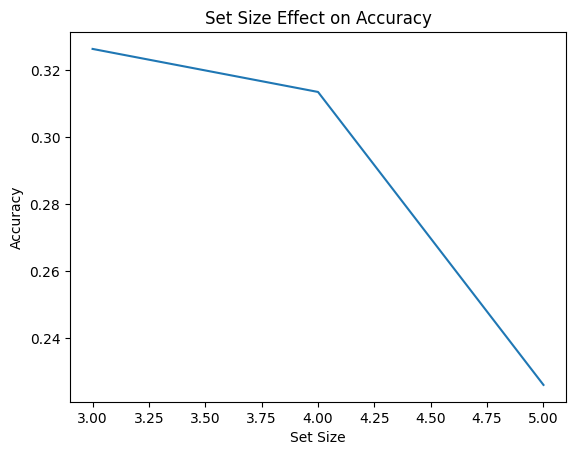

In [46]:
df.groupby('set_size').correct.mean().plot(xlabel= 'Set Size', ylabel= 'Accuracy', title='Set Size Effect on Accuracy')

In [47]:
stim_angle = []
for (row_index,row_data) in df.iterrows():
    stim_angle.append(analysis_pipeline.rad_convert(row_data['stim']))
    
df['stim_angle'] = stim_angle


TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
dec_angle = []
for (row_index,row_data) in df.iterrows():
    dec_angle.append(analysis_pipeline.rad_convert(row_data['decision']))
    
df['dec_angle'] = dec_angle


In [ ]:
ang_dist = []
for (row_index,row_data) in df.iterrows():
    ang_dist.append(analysis_pipeline.find_angular_dist(row_data['stim'],row_data['decision']))
    
df['ang_dist'] = ang_dist

In [ ]:
ang_dist = []
for (row_index,row_data) in df.iterrows():
    ang_dist.append(row_data['stim'] - row_data['decision'])
    
df['ang_dist'] = ang_dist

In [ ]:
df

,set_size,stim,mean,sample,decision,ground_truth,correct,stim_angle,dec_angle,ang_dist
0,5,0.488838,1.400000,[0.8681383864428233],0.488838,1,1,3.07146,3.071460,0.000000
1,3,0.488838,2.333333,[-0.059371705416533804],0.363920,1,0,3.07146,2.286575,0.124918
2,5,0.488838,1.400000,[-0.008521802634737119],0.074521,1,0,3.07146,0.468230,0.414317
3,4,0.488838,1.750000,[0.8613107471662454],0.488838,1,1,3.07146,3.071460,0.000000
4,3,0.488838,2.333333,[1.2912589797556944],0.488838,1,1,3.07146,3.071460,0.000000
...,...,...,...,...,...,...,...,...,...,...
995,3,0.488838,2.333333,[0.5947096214431659],0.488838,1,1,3.07146,3.071460,0.000000
996,5,0.488838,1.400000,[0.4010102085085898],0.601792,1,0,3.07146,3.781169,-0.112954
997,5,0.488838,1.400000,[1.4171419232151323],0.488838,1,1,3.07146,3.071460,0.000000
998,4,0.488838,1.750000,[0.2981633538393293],0.011750,1,0,3.07146,0.073824,0.477088


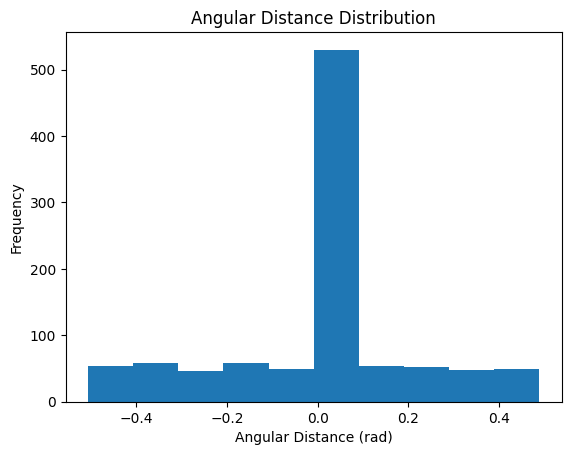

In [ ]:
analysis_pipeline.plot_hist('ang_dist',df,'Angular Distance (rad)','Angular Distance Distribution')

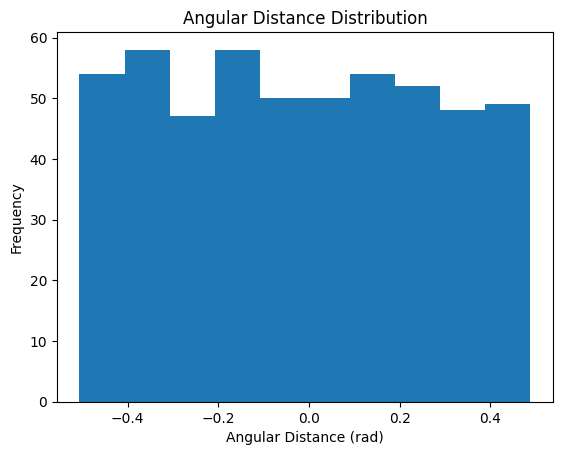

In [ ]:
incorrect_df = df[df['correct'] == 0]
analysis_pipeline.plot_hist('ang_dist',incorrect_df,'Angular Distance (rad)','Angular Distance Distribution')

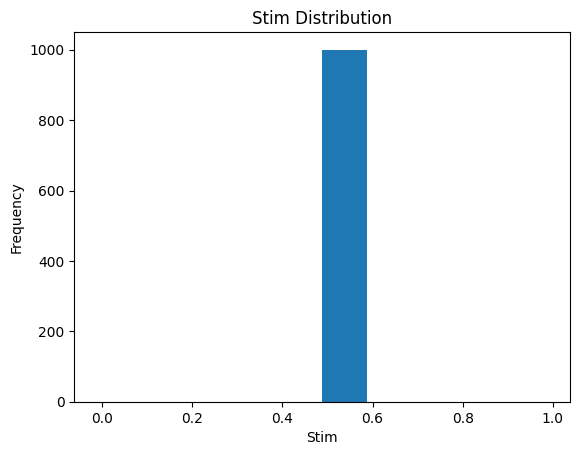

In [ ]:
analysis_pipeline.plot_hist('stim',df,'Stim','Stim Distribution')

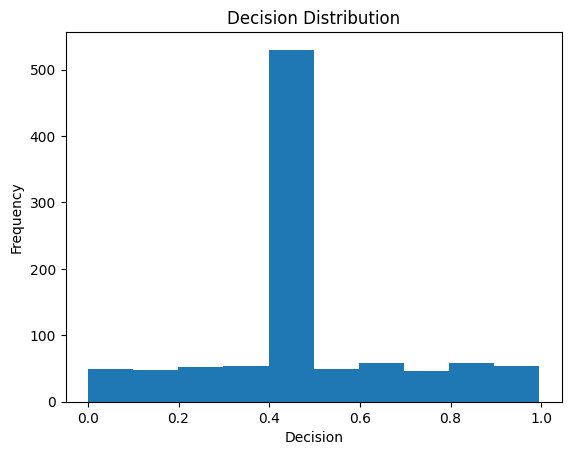

In [ ]:
analysis_pipeline.plot_hist('decision',df,'Decision','Decision Distribution')